# Linear regression example

This notebooks is based on the work by done by https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial.

**Goales from this analysis:**

- We will explore the data for data cleanup and some insights.
- We will explore how to use any insights we get from the insights we get in our EDA phase (Data exploratory analysis) for feature engineering, including new categorical variables we might create from the raw data and interactions between features that will help increase model performance.

## Import Library and Dataset

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
# Import dataset
#path ='dataset/'
path = '../input/'
df_raw = pd.read_csv(path+'insurance.csv')
print('\nNumber of rows and columns in the data set: ',df_raw.shape)
print('')


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data exploration

Our first step will be, as usual, taking a look at the raw data, so we can determine what kind of variables we are working with (categorical/quantitative), as well as check out general variable distribution and missing values. 

In [114]:
#Lets look into top few rows and columns in the dataset
df_raw.head()

,age,sex,bmi,children,smoker,region,charges,children_bucket,bmi_more_than_30,outlier
0,19,female,27.900,0,yes,southwest,16884.92400,child0,0,False
1,18,male,33.770,1,no,southeast,1725.55230,child1,1,False
2,28,male,33.000,3,no,southeast,4449.46200,child3+,1,False
3,33,male,22.705,0,no,northwest,21984.47061,child0,0,True
4,32,male,28.880,0,no,northwest,3866.85520,child0,0,False


In [3]:
# Data exploration
#  Start by understanding the data (categorical vs. numeric, what's the range ie. min() and max())
df_raw.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


We have 4 quantitative variables (including the target variable [charges]) and 3 caegorical variables.

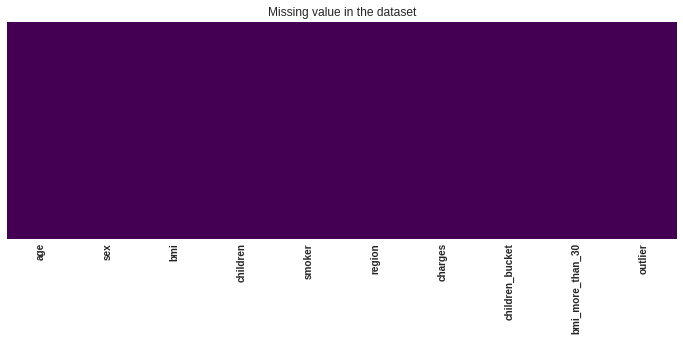

In [115]:
# check for missing values
plt.figure(figsize=(12,4))
sns.heatmap(df_raw.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

We can see there are no _null_ values in our dataset. In case there were, we'd have to think about how to impute the data.
Next we check for correlated features.

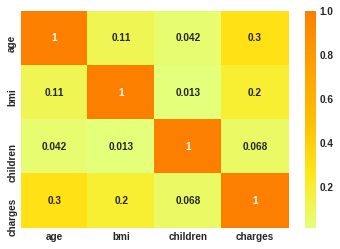

In [5]:
# Check for correlated variables
corr = df_raw.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

# There doesn't seem to be any significant correlation between quantitative variables

### Exploring relationships between the target variable and the independent variables visually
First we'll take a look at how our target variable behaves when segmented by our categorical variables.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


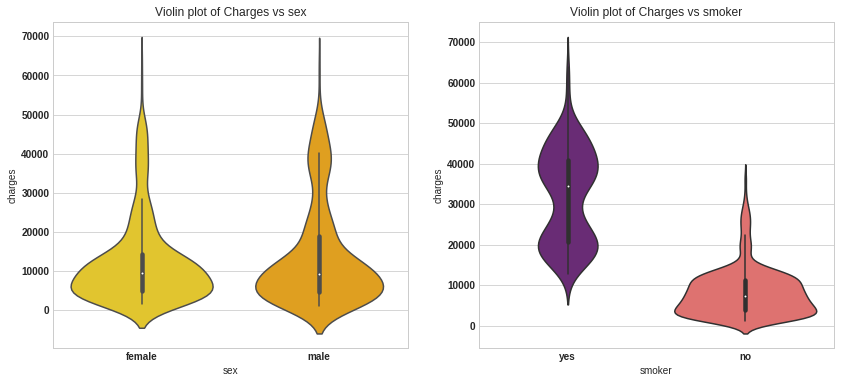

In [6]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df_raw,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df_raw,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

- Left plot: [sex] doesn't seem to have any particular effect on the [changes] variable.
- Right plot: There's definitely a difference between the charges for smokers vs non-smokers. Notice that the [charges] variable is bimodal when restricted to the [Smoker] = "yes" subsample, which indicates we might be able to further separate this population into two more groups (as we'll see shortly).

Next let's see how # of children affects the target variable:

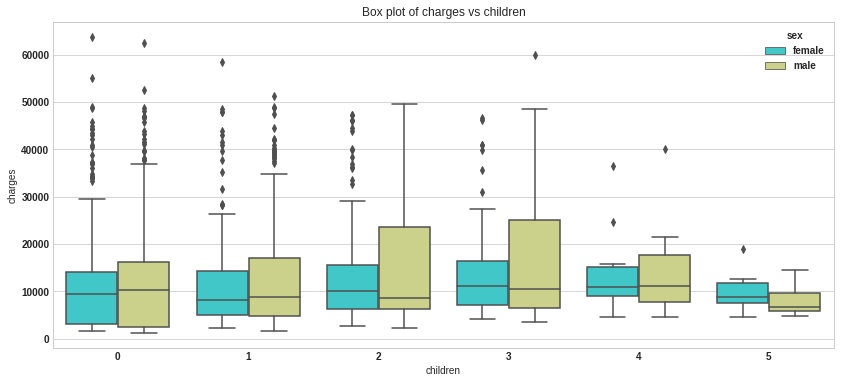

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df_raw,palette='rainbow')
plt.title('Box plot of charges vs children');

In general we don't identify visualy any hard evidence that might lead us to believe that the number of children could determine how much a person gets charged. There seems to be less variability for higher values (4 and more), which we can see happens because of there being less observations for these two groups:

In [116]:
print(df_raw['children'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5,1,'Violin plot of Charges vs sex')

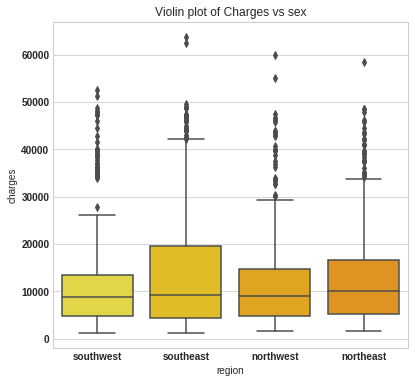

In [120]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.boxplot(x='region', y='charges',data=df_raw,palette='Wistia',ax=ax)
ax.set_title('Boxplot of Charges vs region')

There doesn't seem to be a definite split between different regions, although we might want to keep an eye on the southeast, where we can see more spread among the data, indicating that there are higher charges here.

Next we explore how our target variable behaves when compared to our quantitative variables. We'll include a color dimension for the [smoker] variable since it is evident from our previous plots that it has visible effect on the [charges] variable:

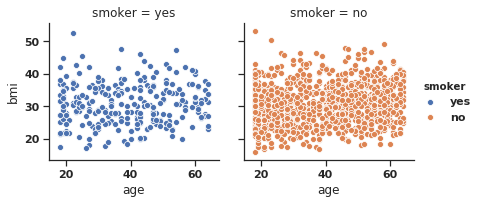

In [133]:
g = sns.FacetGrid(df_raw, col="smoker", hue="smoker")
g.map(sns.scatterplot, "age", "charges")
g.add_legend()

We can see there's a clear linear relationship between age and charges. Furthermore, the slope for the non-smoker population and the smoker population seems to be pretty much the same. We can see that each group (smokers and non smokers) can be clearly separated into two more groups.

Let's see how our target variable behaves when compared to the [bmi] variable:

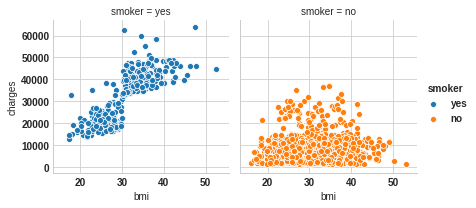

In [123]:
g = sns.FacetGrid(df_raw, col="smoker", hue="smoker")
g.map(sns.scatterplot, "bmi", "charges")
g.add_legend()

**What could be causing this separation within the smokers group along the [charges] variable?** As can be seen from the plot on the left, it seems like there's a hard cut between bmi less than 30 and bmi more than 30, so it might be a good idea to include such a variable into our model upfront. For the plot on the right, we can't see this effect for the non-smoking population, and here again we can see (not as clearly as in the previous plot) that there's a subgroup within the non-smokers that's being charged more that the majority.

In [12]:
df_raw['bmi_more_than_30'] = np.where(df_raw['bmi'] < 30, 0, 1)

Let's see how our new categorical variable splits the data:

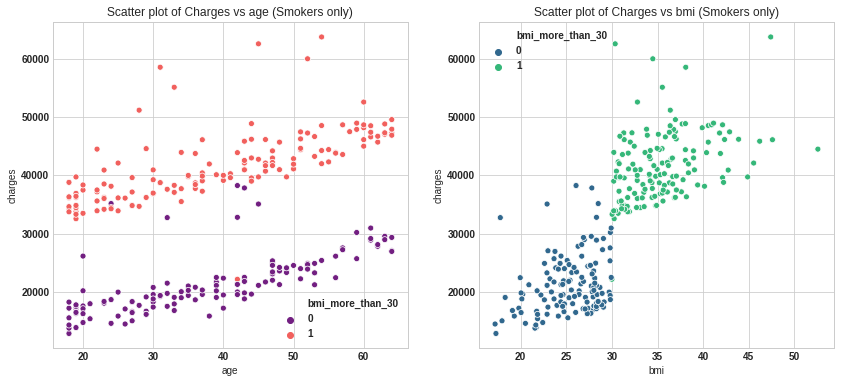

In [13]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df_raw[df_raw.smoker == "yes"],palette='magma',hue='bmi_more_than_30',ax=ax)
ax.set_title('Scatter plot of Charges vs age (Smokers only)')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df_raw[df_raw.smoker == "yes"],palette='viridis',hue='bmi_more_than_30')
ax.set_title('Scatter plot of Charges vs bmi (Smokers only)')
plt.savefig('sc.png');

As mentioned before, for the non-smoker population, there's a set of points that clearly deviates from the overall population. We'll definitely want to check out if we can identify any specific clusters when comparing all variables against each other, but when doing so we don't identify any variable that could lead to a conclusive split in this subset of the data -- in practice you might want to check in with the business to understand why these points differ from the others and this might reveal that we need some more features into our model. For the moment we'll define an ad-hoc hard-coded rule to separate them from the bulk and drop them.

In [157]:
# We'll revisit this problem in the outlier detection module. For the moment let's just apply a simple rule based on the observed values: 

df_raw['outlier'] = (df_raw.charges > 5000 + 15000/70 * df_raw.age) * df_raw.smoker == "no"

Text(0.5,1,'Scatter plot of Charges vs age')

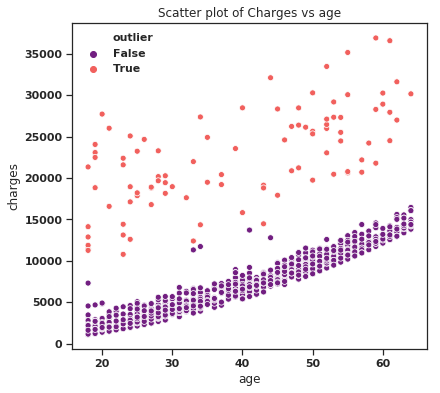

In [158]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df_raw[df_raw.smoker == "no"],palette='magma',hue='outlier',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

In [159]:
df = df_raw[df_raw.outlier == False]

## Data preprocessing
We'll start by encoding categorical variables and splitting the data into a training set and a validation set:

In [160]:
# Dummy variable
categorical_columns = ['sex','children_bucket', 'smoker', 'region'] # we're not including the [bmi_more_than_30] variable since it's already encoded
df_encode = pd.get_dummies(data = df, prefix = 'cat', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
               dtype='int8')


df_encode.head()

,age,bmi,children,charges,bmi_more_than_30,outlier,cat_male,cat_child1,cat_child2,cat_child3+,cat_yes,cat_northwest,cat_southeast,cat_southwest
0,19,27.90,0,16884.9240,0,False,0,0,0,0,1,0,0,1
1,18,33.77,1,1725.5523,1,False,1,1,0,0,0,0,1,0
2,28,33.00,3,4449.4620,1,False,1,0,0,1,0,0,1,0
4,32,28.88,0,3866.8552,0,False,1,0,0,0,0,1,0,0
5,31,25.74,0,3756.6216,0,False,0,0,0,0,0,0,1,0


In [161]:
# Let's include the smoker AND high bmi interaction term
df_encode['cat_smoker_and_bmi30'] = df_encode['cat_yes'] * df_encode['bmi_more_than_30']

In [162]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

## Modeling
We'll try out first an OLS model with interaction between the [smoker] and [bmi_gt_30] variable, and [age].

Then we'll try out a Lasso without any sort of feature selection in order to see if we get the same result or better than the first one.

In [170]:
# Model 1
mod1_features = ['age','cat_yes', 'cat_smoker_and_bmi30']
X_train_1 = X_train[mod1_features]
X_test_1 = X_test[mod1_features]

# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_1,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
[lin_reg.intercept_]+list(lin_reg.coef_)
#parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
#parameter_df

[-3540.3701756281607, 269.5299708130057, 14795.120654514129, 19980.78742019764]

In [172]:
# Evaluate my model
y_pred_1 = lin_reg.predict(X_test_1)

#   Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_1, y_test)
print('SMSE on test set: ',  np.sqrt(J_mse_sk))
print('R2 on test set: ',  str(lin_reg.score(X_test_1, y_test)))

SMSE on test set:  2262.0389558667252
R2 on test set:  0.9635264680581529


A 96% R2 is pretty good. We'll need to check if our assumptions hold, i.e. linearity, normality of the residuals and homoscedasticity.

## Assumption check
We'll verify that the model assumptions hold by residual analysis

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


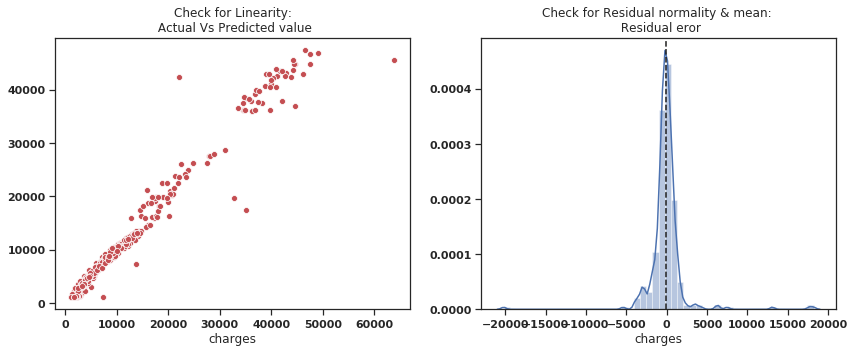

In [165]:
# Let's check out if our assumptions hold via residual analysis
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_1,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_1),ax=ax,color='b')
ax.axvline((y_test - y_pred_1).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

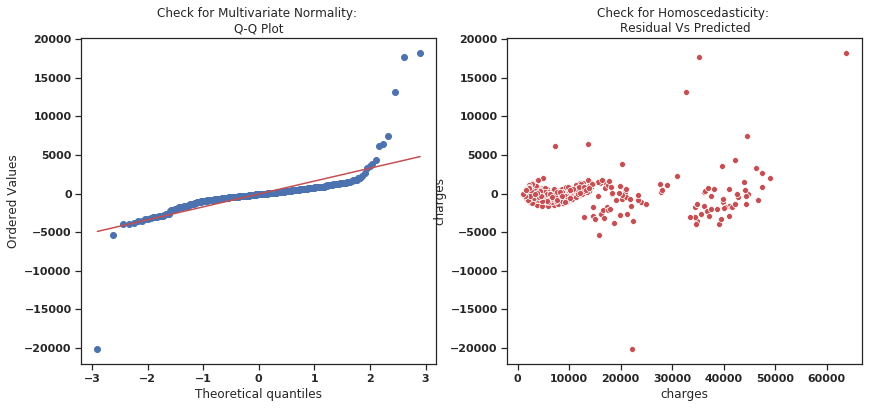

In [166]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_1),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_1), x= y_test, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [168]:
# Check for Multicollinearity
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_1.values, i)
                          for i in range(len(X_train_1.columns))]
  
print(vif_data)

                feature       VIF
0                   age  1.412955
1               cat_yes  2.460712
2  cat_smoker_and_bmi30  2.225910
3           cat_child3+  1.196015


1. Linearity seems to hold well enough.
2. Our residuals are nicely centered around 0, although there seems to be some outliers, especially a couple of values our model is underestimating.
3. Our residuals are fairly normal, as we can see from the qqplot, with the exception of the outliers we mentiones before. We might want to remove these outliers and fit our model again, then test for normality with a Shapiro Wilk test.
4. Homoscedasticity kind of holds, but there's definitely more variance in both smoker samples (clusters 1 and 2), both with low as well as high bmi.
5. There is no multicolinearity (VIF < 5)